In [2]:
from konlpy.tag import Hannanum
import pandas as pd
def flatten(items): #2차원 리스트를 1차원 리스트로 변환
        flatList=[]
        for elem in items:
            if type(elem) == list: #자료형이 리스트이면
                for e in elem: #개별 원소를 추가
                    flatList.append(e)
            else: #리스트가 아니면 그대로 추가
                flatList.append(elem)
        return flatList

In [3]:
f=open(f'c:/data/twitter/twitter_5m.txt', encoding='utf-8')
lines = f.readlines() 
f.close()

han=Hannanum() #한나눔 패키지
temp=[]
for j in range(len(lines)):
    a=lines[j].strip() #공백,줄바꿈,탭 제거
    temp.append(han.nouns(a))

In [4]:
stopwords = ['#WednesdayWordExpo', '#thebucheon', '#大邱', '#新冠肺炎', '#新天地', '#李万熙', '#虚假报道', "'코로나19", "'코로나19'", '/20200502070024839\xa0…', '/20200505070112092\xa0…', 
'/20200519051505627\xa0…', '/20200522060602773\xa0…', '/20200528050752979\xa0…', '05.', '0명', '1.', '10', '100', '100명', '10만명', '10명', '11일', '12', '12일', '13일', '15-30만까지벌수있다', 
'15일', '1654', '1656', '1671', '1675', '1689', '1692', '18일', '19', '19일', '1년', '1만명', '1명', '1분기', '1월', '1위', '1일', '1차', '2.', '20', '2020', '2020.', '2020년', '20대', '20일', 
'23세', '25일', '28', '2년', '2명', '2배', '2월', '2주', '2차', '3.', '30', '3000만원', '30대', '31번', '3년', '3명', '3월', '3주년', '4.', '40', '4명', '4월', '4일', '5.', '5월', '5일', '6월', 
'6일', '7월', '7일', '80', 'CIX(씨아이엑스),', 'Q&A', '[코로나19', '[코로나19]', 'com', 'f=m&from=mtop\xa0…', 'f=m\xa0…', 'html\xa0…', 'idxno=730577\xa0…', 'input=tw\xa0…', '\xa0pic.', '\xa0…', 
'\xa0…pic.', '‘코로', '‘코로나19', '‘코로나19’', 'ㅅㅂ', 'ㅋㅋ', 'ㅋㅋㅋ', 'ㅋㅋㅋㅋ', 'ㅋㅋㅋㅋㅋ', 'ㅎㅎ', 'ㅏㅏㅏㅏㅏ', 'ㅜㅜ', 'ㅠㅠ', 'ㅠㅠㅠ', 'ㅠㅠㅠㅠ', 'ㅠㅠㅠㅠㅠ', 'ㅡㅡ', '韓日', '"코로나19',
'일당15-30만~당일결제', '일당15-30만ㄱㅗ수익', '사기거절', '상다카톡', '상담카톡:', '상담톡:', '네이버', '뉴스', '뉴스1', '출처', '집에서편하', '언제', '언제던연락주세요', '나이23세이상', '환영',
'계약금', '예약금', '할수있는알ㅂㅏ', '누구','알ㅂㅏ', '자택알ㅂㅏ']

In [5]:
word_list1 = flatten(temp)
word_list2 = [x for x in word_list1 if len(x)>1]
word_list3 = [i for i in word_list2 if i not in stopwords]
word_list4 = pd.Series(word_list3)
word_list5 = word_list4.value_counts().head(200)
word_list6 = list(word_list5.index)

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
vec=CountVectorizer()
X=vec.fit_transform(word_list6) 
df=pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
df.head()

,가능,가능성,가짜뉴스,감사,감염,감염병,감염자,감염증,개발,개학,...,항체,행복,현황,확산,확인,확진,확진자,환자,활동,회사
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


DBSCAN(algorithm='auto', eps=2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=2, n_jobs=None, p=None)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


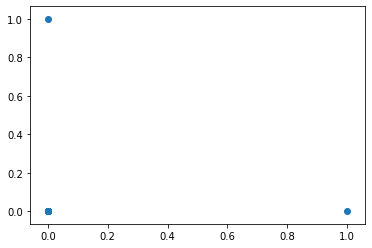

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import numpy as np

X=np.array(df)
# eps 최소거리, min_samples 최소샘플갯수
# 거리 3 이내에 2개 이상의 샘플이 모여 있으면 군집으로 분류
# 규칙에 맞지 않는 샘플들은 -1로 분류됨(아웃라이어)
model=DBSCAN(eps=2, min_samples=2).fit(X)
print(model)
print(model.labels_)
plt.scatter(X[:,0],X[:,1])